# Project Analysis: Market Risk and Company Financial Data

###### Prepared By: Sadhna Shukla
###### Date: January 26, 2025

## Part A: Company Financial Data Analysis

### Import necessary libraries

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

####  Loading the dataset for Part A

In [4]:
df1 = pd.read_csv('Comp_Fin_Data.csv')

In [146]:
df1.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE,default
17,18,28.2,48.3,28.2,62.1,1.1,62.9,0.3,3.5,0.7,...,13.83,13.75,6.54,210500.0,10.0,1.43,1.43,48.3,NaN,0
18,19,1.6,26.3,1.8,51.6,6.8,58.6,-0.2,0.6,-0.4,...,14.58,2.78,5.03,NaN,NaN,0.00,0.00,26.3,NaN,1
25,26,9.2,19.9,8.5,18.9,-0.3,18.4,0.2,2.2,0.2,...,33.38,16.02,19.60,NaN,NaN,0.00,0.00,19.9,NaN,0
30,31,1.6,1.7,1.6,1.0,0.0,1.0,0.0,0.0,0.0,...,17.40,8.70,5.33,150000.0,10.0,0.00,0.00,1.7,NaN,0
38,39,43.0,65.3,41.8,51.6,0.5,51.3,0.8,4.1,1.4,...,7.52,7.80,7.02,3305400.0,10.0,0.57,0.57,65.3,NaN,0


### PART A: Define the problem and perform Exploratory Data Analysis
#### Problem definition - Check shape, Data types, and statistical summary - Univariate analysis - Multivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables

### Check Shape, Data Types, and Summary Statistics

In [8]:
# Shape of the dataset
print(f"Dataset Shape: {df1.shape}")

# Data types and non-null counts
print(df1.info())

# Summary statistics
print(df1.describe())


Dataset Shape: (4256, 51)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          410

### Check Missing Values

### Univariate Analysis (Key Variables)

In [11]:
# Missing values summary
missing_values = df1.isnull().sum()
missing_percentage = (missing_values / len(df1)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
print(missing_summary[missing_summary['Missing Values'] > 0])


                                       Missing Values  Percentage (%)
Total income                                      231        5.427632
Change in stock                                   550       12.922932
Total expenses                                    165        3.876880
Profit after tax                                  154        3.618421
PBDITA                                            154        3.618421
PBT                                               154        3.618421
Cash profit                                       154        3.618421
PBDITA as % of total income                        79        1.856203
PBT as % of total income                           79        1.856203
PAT as % of total income                           79        1.856203
Cash profit as % of total income                   79        1.856203
Sales                                             305        7.166353
Income from fincial services                     1111       26.104323
Other income        

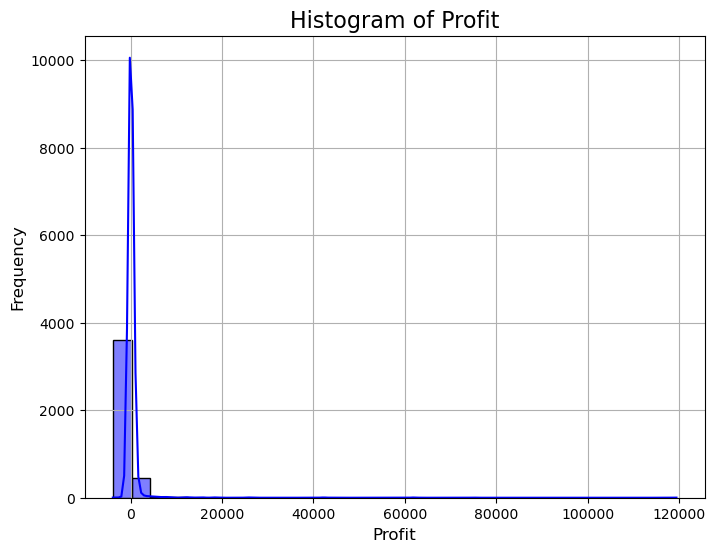

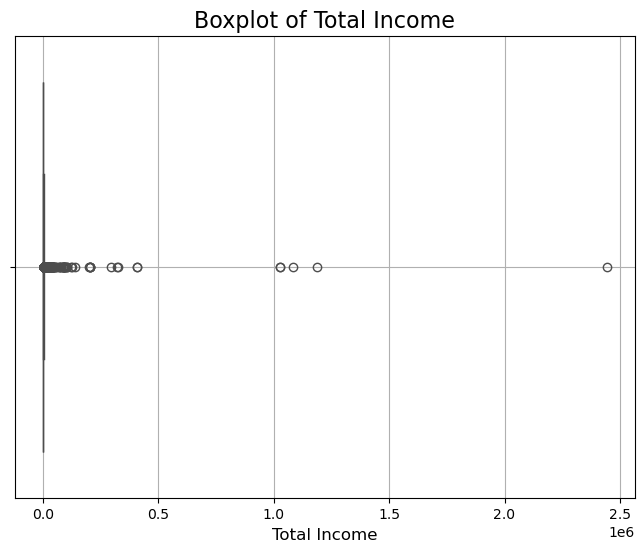

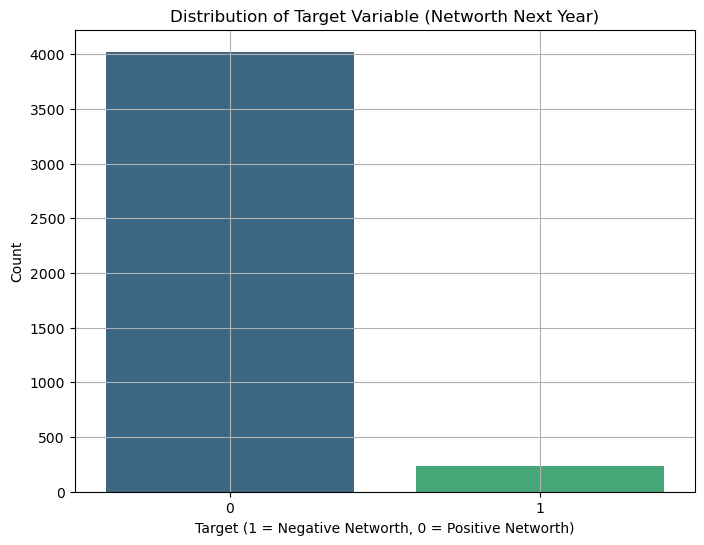

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.histplot(df1['Profit after tax'], kde=True, color='blue', bins=30)
plt.title('Histogram of Profit', fontsize=16)
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['Total income'], color='blue')
plt.title('Boxplot of Total Income', fontsize=16)
plt.xlabel('Total Income', fontsize=12)
plt.grid(True)
plt.show()

# Count plot for Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x=(df1['Networth Next Year'] < 0).astype(int), palette='viridis')
plt.title('Distribution of Target Variable (Networth Next Year)')
plt.xlabel('Target (1 = Negative Networth, 0 = Positive Networth)')
plt.ylabel('Count')
plt.grid()
plt.show()

## Multivariate Analysis (Correlation Heatmap)

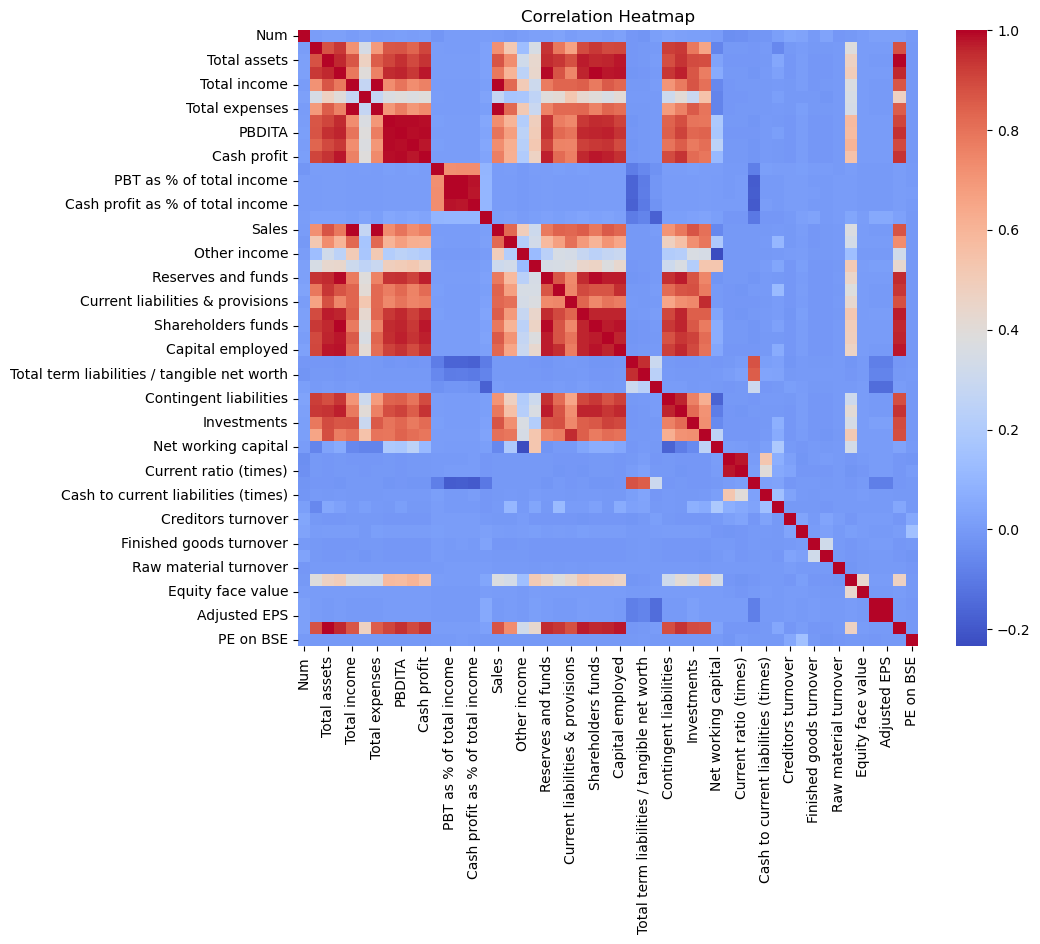

In [33]:
# Heatmap for Correlation
plt.figure(figsize=(10, 8))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


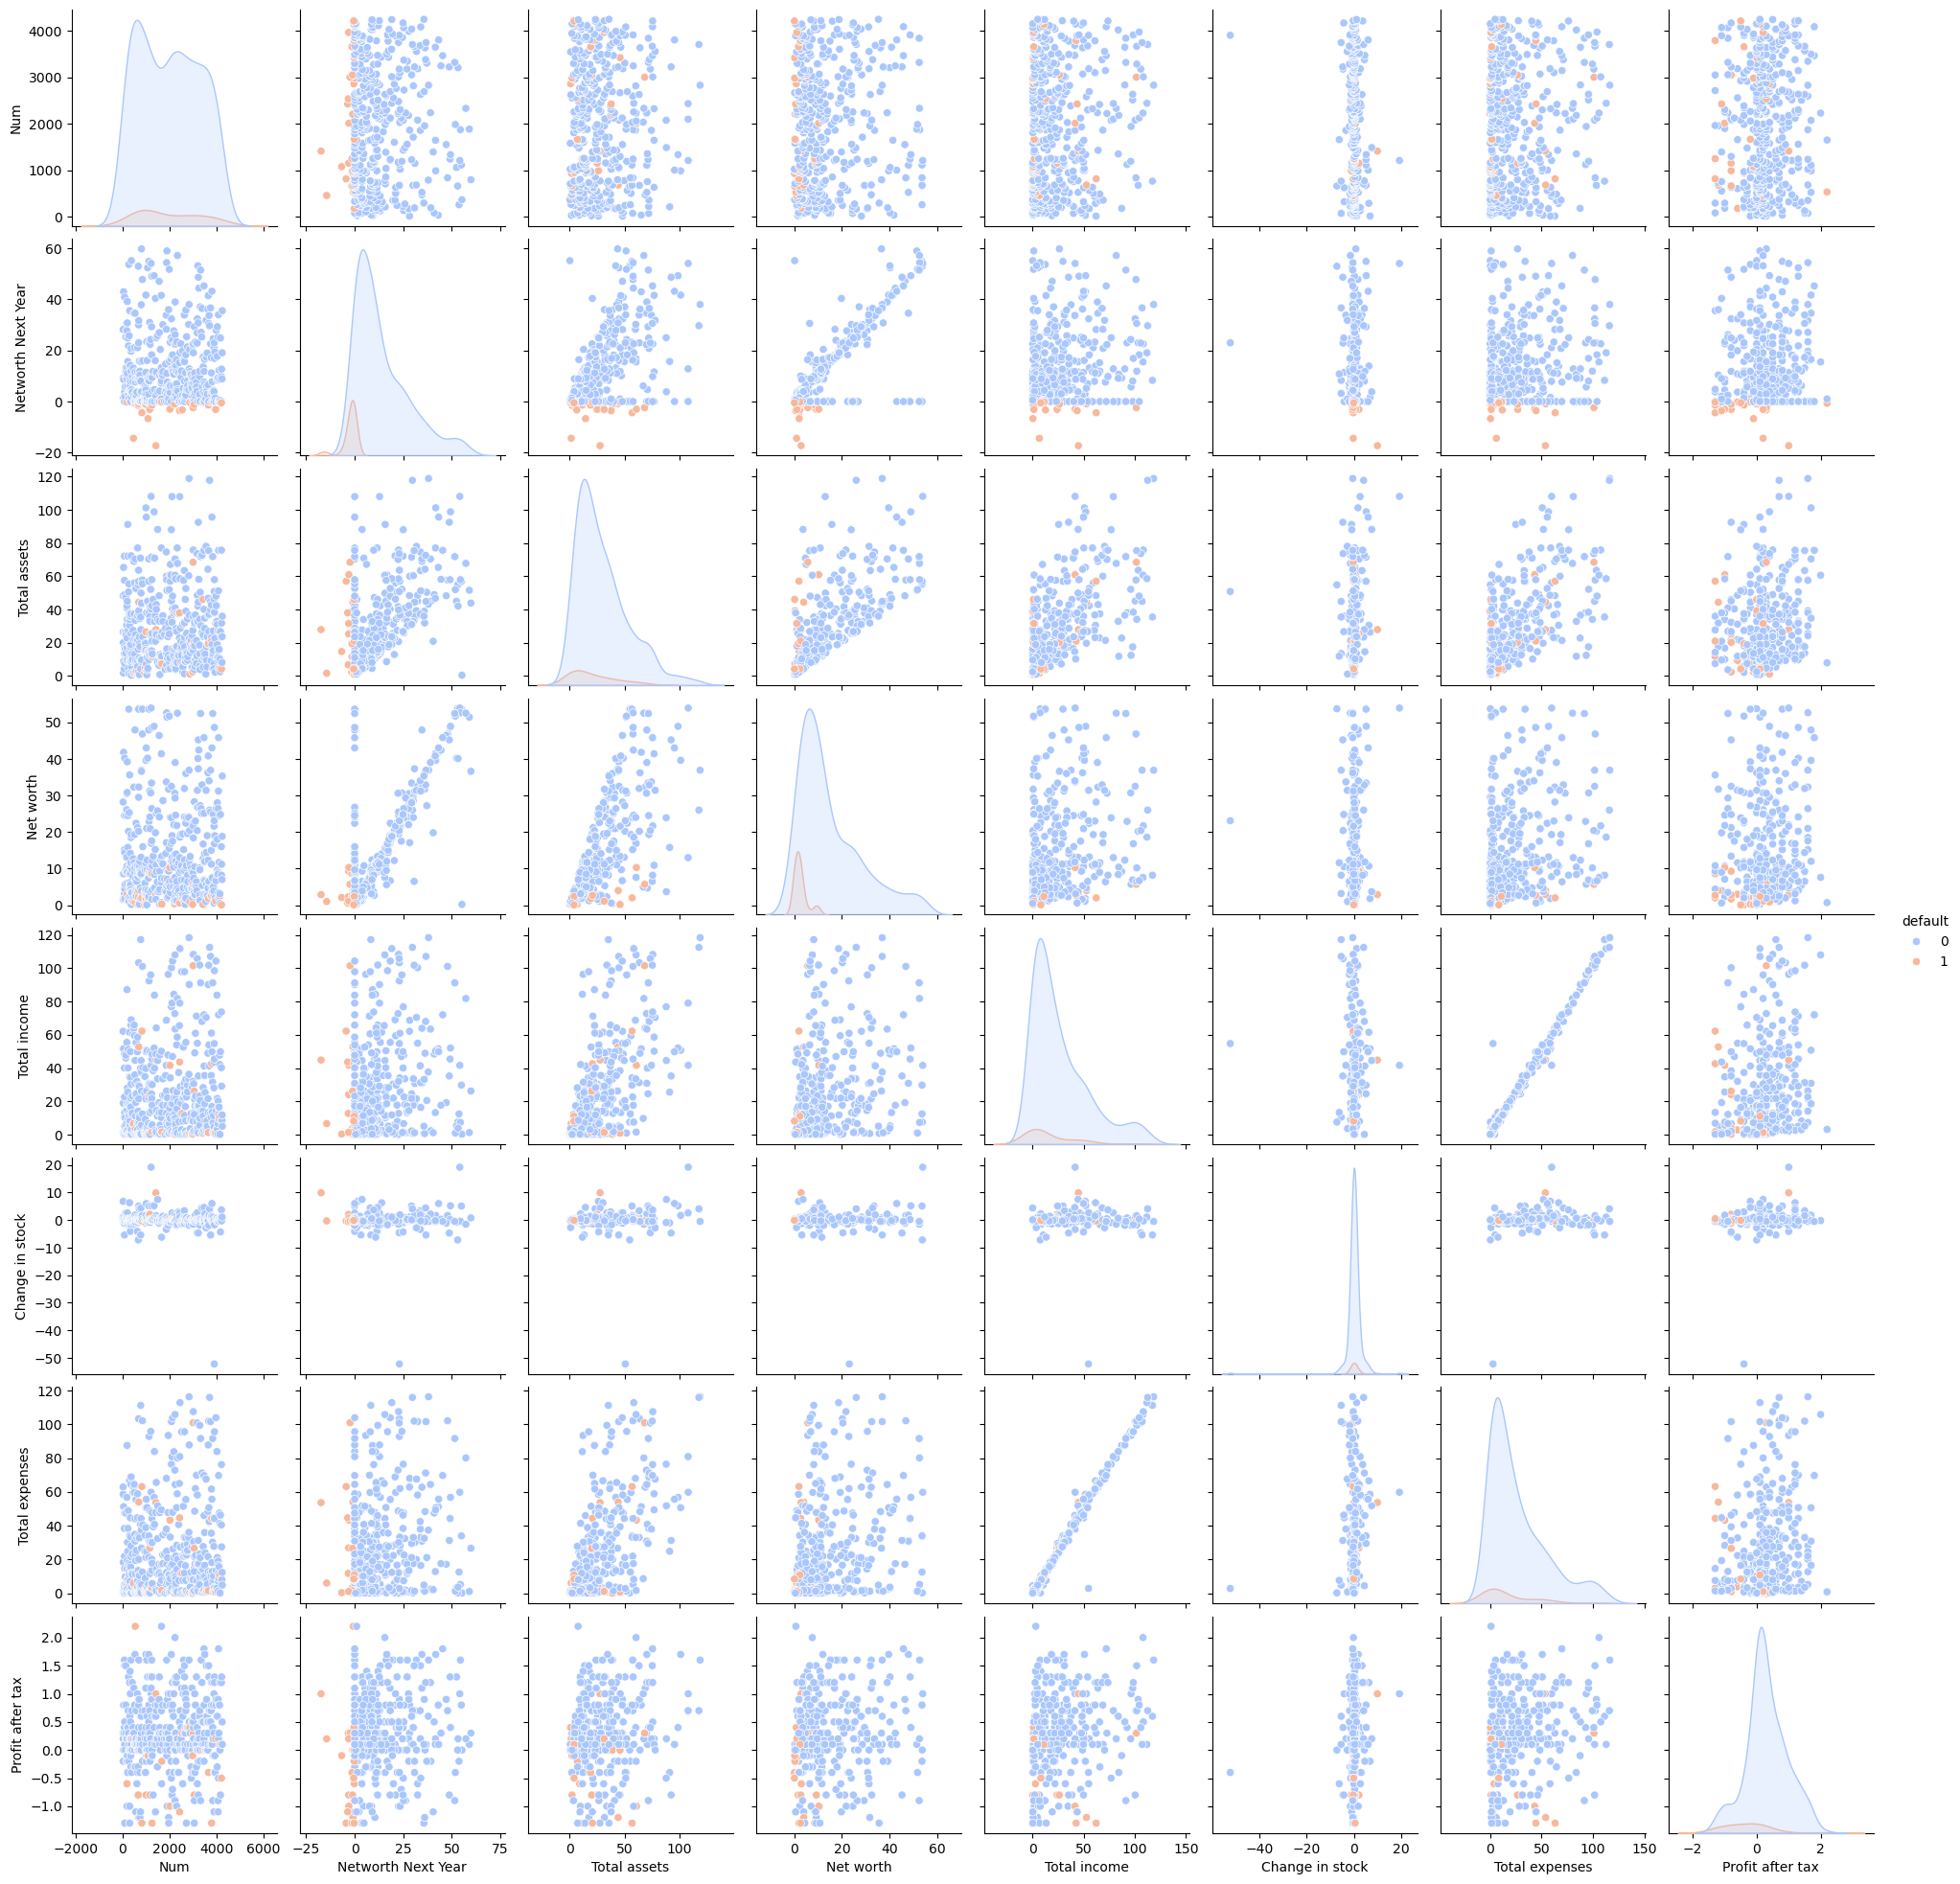

In [168]:
# Creating the 'default' column based on 'Networth Next Year'
df1['default'] = (df1['Networth Next Year'] < 0).astype(int)

# Selecting relevant features for the pair plot
features = ['Num', 'Networth Next Year', 'Total assets', 'Net worth', 
            'Total income', 'Change in stock', 'Total expenses', 
            'Profit after tax', 'default']

# Generating the pair plot
sns.pairplot(df1[features], hue='default', palette='coolwarm')

# Display of plot
plt.show()


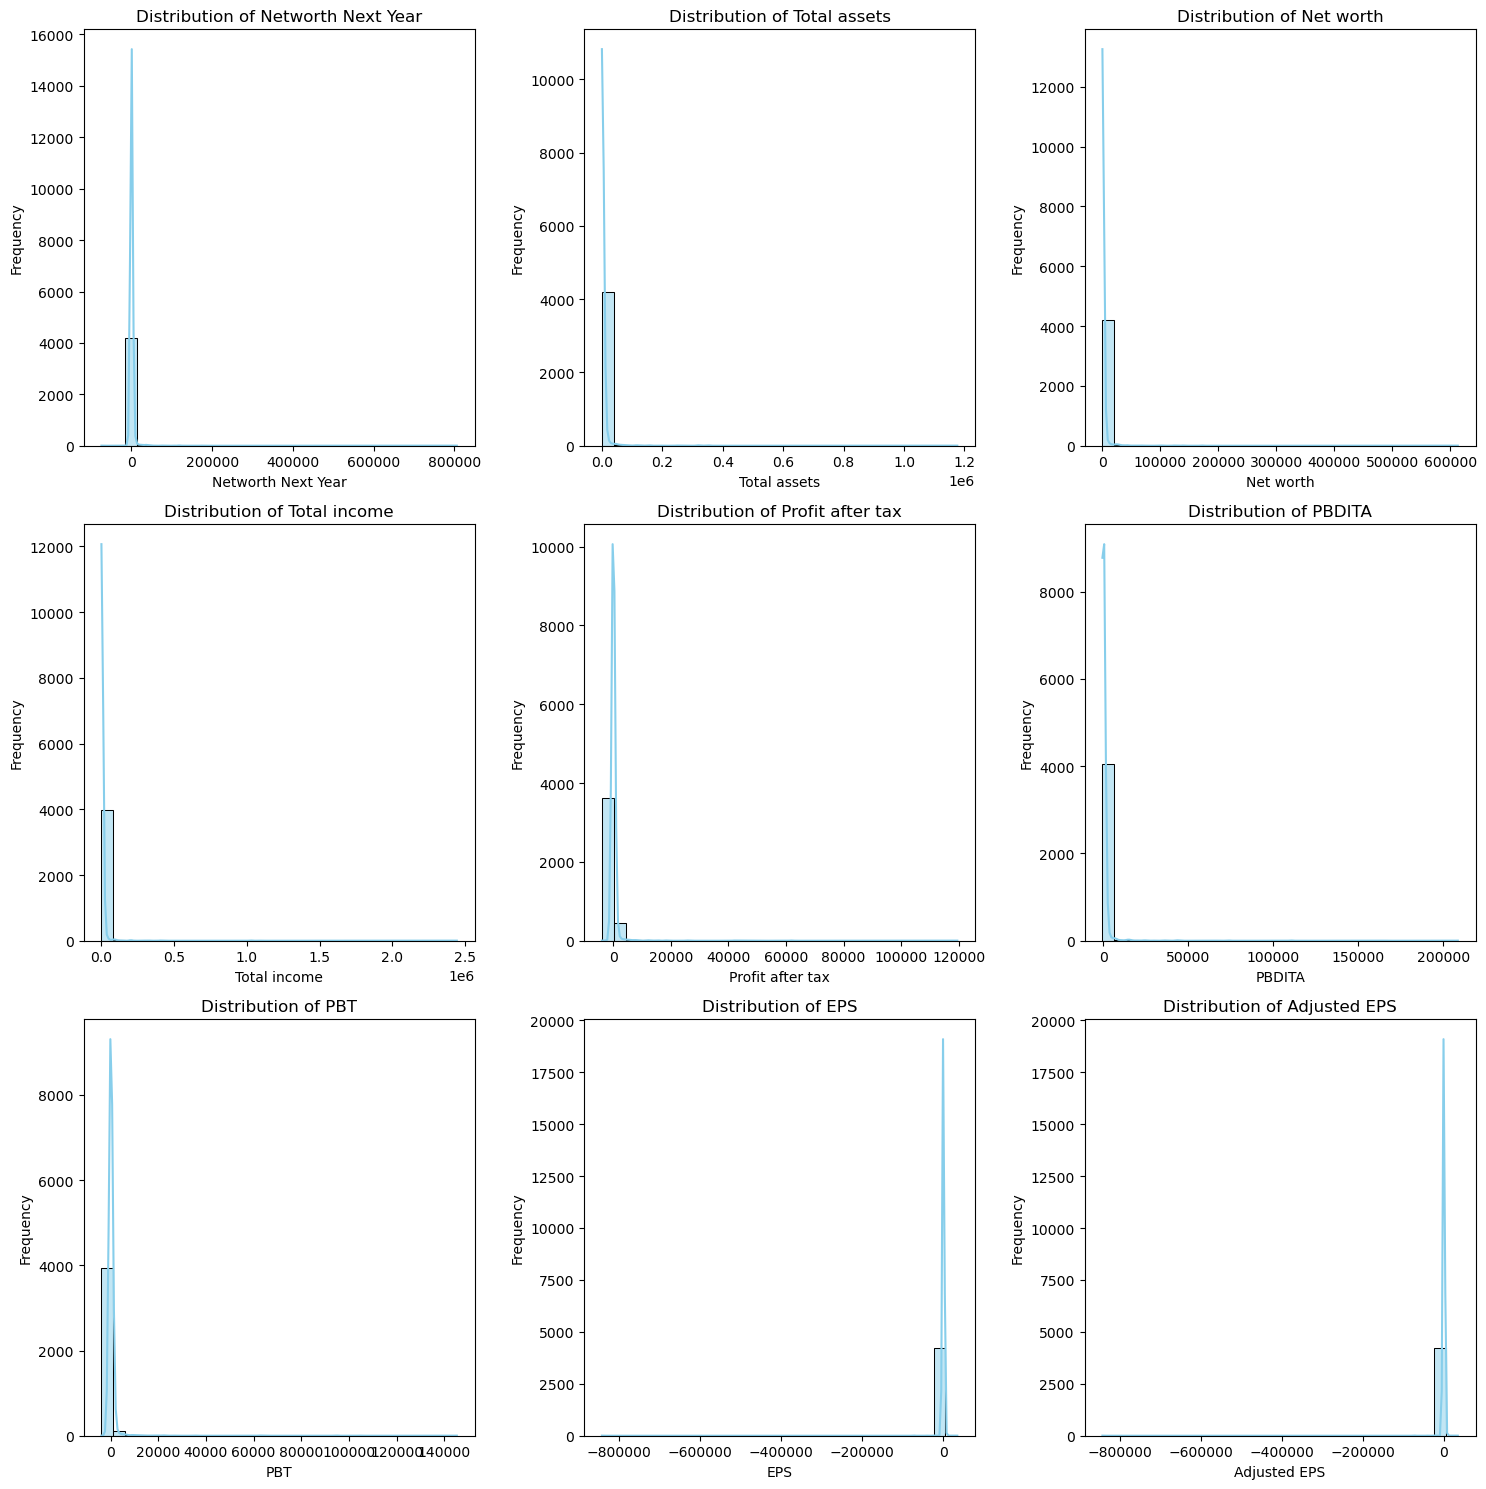

In [37]:

key_variables = [
    'Networth Next Year', 'Total assets', 'Net worth', 'Total income', 
    'Profit after tax', 'PBDITA', 'PBT', 'EPS', 'Adjusted EPS'
]

# subplots for histograms
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Plotting Histograms for the selected variables
for i, var in enumerate(key_variables):
    # Histogram
    sns.histplot(df1[var].dropna(), kde=True, ax=axes[i], color='skyblue', bins=30)
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# PART A: Data Pre-processinge

### Prepare the data for modeling: - Outlier Detection (treat, if needed) - Encode the data - Data split - Scale the data - Target variable creation  The target variable is default and should take the value 1 when net worth next year is negative & 0 when net worth next year is positive

# Data Preprocessing

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sample column names based on  data
numerical_columns = ['Networth Next Year', 'Total assets', 'Net worth', 'Total income', 'Total expenses', 'Profit after tax', 'PBDITA', 'PBT', 'Cash profit']

# Outlier Detection (using IQR)
def detect_outliers(df1, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]

# Apply outlier detection to each numerical column
for col in numerical_columns:
    df1 = detect_outliers(df1, col)


# Data Split
# Define target variable 'default' based on 'Networth Next Year' and 'Net worth'
df1['default'] = (df1['Networth Next Year'] < df1['Net worth']).astype(int)

# Split the data
X = df1.drop(columns=['default'])  # Drop the target variable
y = df1['default']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#  Scale the data (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Outlier Detection (using IQR for numerical columns)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numerical_columns = [
    'Networth Next Year', 'Total assets', 'Net worth', 'Total income', 
    'Total expenses', 'Profit after tax', 'PBDITA', 'PBT', 'Cash profit'
]

# Apply outlier detection for each numerical column
for col in numerical_columns:
    df1 = detect_outliers(df1, col)

#  Handle Missing Values (Impute or Drop)
# Checking for missing values in the dataframe
print(df1.isnull().sum())

# Impute missing values with the median for numerical features (you can also use mean or mode)
df1['Networth Next Year'].fillna(df1['Networth Next Year'].median(), inplace=True)
df1['Total assets'].fillna(df1['Total assets'].median(), inplace=True)
df1['Total income'].fillna(df1['Total income'].median(), inplace=True)
df1['Net worth'].fillna(df1['Net worth'].median(), inplace=True)

#  Create the Target Variable 'default'
# Set 'default' to 1 if 'Networth Next Year' < 'Net worth', otherwise set it to 0
df1['default'] = (df1['Networth Next Year'] < df1['Net worth']).astype(int)

#  Data Split
X = df1.drop(columns=['default'])  # Features (excluding the target variable)
y = df1['default']  # Target variable ('default')

# Split the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# Scaling the Data (Standardization)
scaler = StandardScaler()

# Fit and transform the training data (standardize numerical columns only)
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])

# Transform the test data using the same scaler (do not fit on the test data!)
X_test_scaled = scaler.transform(X_test[numerical_columns])

# Model Training (Logistic Regression)
model = LogisticRegression(random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Model Evaluation (Prediction and Metrics)
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for logistic regression (you can modify it)
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']}

# Initialize GridSearchCV with LogisticRegression and the parameter grid
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)




NameError: name 'df1' is not defined

# PART A: Model Building
### Metrics of Choice (Justify the evaluation metrics) - Model Building (Logistic Regression, Random Forest) - Model performance check across different metrics

# 2. Model Building


Logistic Regression Performance:
Accuracy: 0.8480
Precision: 0.8630
Recall: 0.6923
F1-Score: 0.7683
ROC-AUC: 0.8867


Random Forest Performance:
Accuracy: 0.8200
Precision: 0.7614
Recall: 0.7363
F1-Score: 0.7486
ROC-AUC: 0.8587


Logistic Regression Confusion Matrix:
[[149  10]
 [ 28  63]]


Random Forest Confusion Matrix:
[[138  21]
 [ 24  67]]




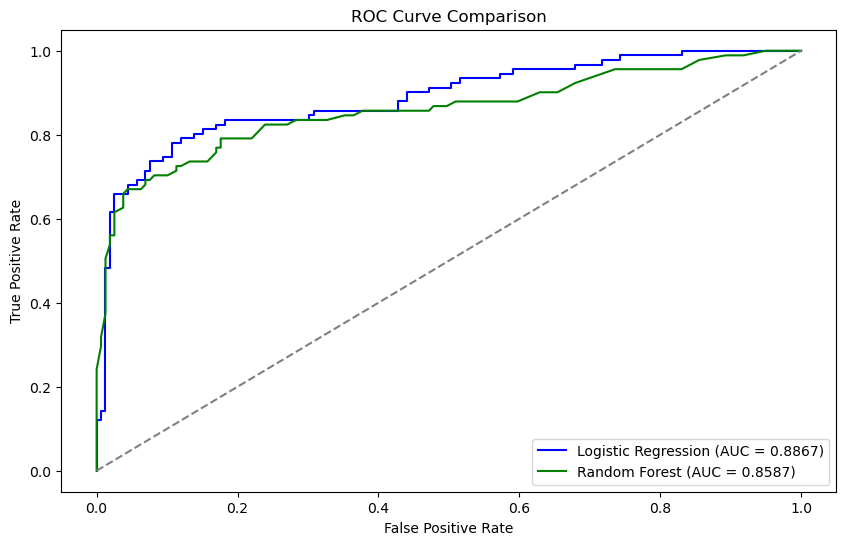

In [62]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Data Split (already done in previous steps)
X = df1.drop(columns=['default'])
y = df1['default']

# Handle Missing Values by Imputing with Mean (you can also use median or mode based on your data)
imputer = SimpleImputer(strategy='mean')  # You can choose 'median' or 'most_frequent' depending on your data
X_imputed = imputer.fit_transform(X)

# Train-Test Split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, stratify=y, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Random Forest Model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Model Predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate Models Across Different Metrics

# Logistic Regression Metrics
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:,1])

# Random Forest Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test_scaled)[:,1])

# Print Metrics for Both Models
print("Logistic Regression Performance:")
print(f"Accuracy: {log_reg_accuracy:.4f}")
print(f"Precision: {log_reg_precision:.4f}")
print(f"Recall: {log_reg_recall:.4f}")
print(f"F1-Score: {log_reg_f1:.4f}")
print(f"ROC-AUC: {log_reg_roc_auc:.4f}")
print("\n")

print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"ROC-AUC: {rf_roc_auc:.4f}")
print("\n")

# Confusion Matrices for Both Models
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\n")

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\n")

# ROC Curve for Both Models
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, random_forest.predict_proba(X_test_scaled)[:,1])

plt.figure(figsize=(10,6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', label=f'Logistic Regression (AUC = {log_reg_roc_auc:.4f})')
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {rf_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


## Model Performance Analysis:
#### Based on the metrics provided for both Logistic Regression and Random Forest, here is an analysis:

##### 1. Accuracy:
* Logistic Regression: 84.80%
* Random Forest: 82.00%
##### Insight: The logistic regression model has a higher accuracy, but accuracy might not be the best metric here due to potential class imbalance. Other metrics, especially those related to the minority class (default), are more informative.

#### 2. Precision:
* Logistic Regression: 86.30%
* Random Forest: 76.14%
##### Insight: Logistic Regression has higher precision, meaning that when it predicts a positive class (default), it is more likely to be correct. This indicates fewer false positives compared to the Random Forest model.

#### 3. Recall:
* Logistic Regression: 69.23%
* Random Forest: 73.63%
##### Insight: The Random Forest model performs better in terms of recall, which means it is better at identifying actual positive instances (defaults). This is important in scenarios where we want to minimize the risk of missing any positive (default) cases.

#### 4. F1-Score:
* Logistic Regression: 76.83%
* Random Forest: 74.86%
##### Insight: The F1-score takes into account both precision and recall, and in this case, Logistic Regression slightly outperforms Random Forest. This could be due to the higher precision achieved by Logistic Regression.

#### 5. ROC-AUC:
* Logistic Regression: 88.67%
* Random Forest: 85.87%
##### Insight: Logistic Regression again outperforms Random Forest in ROC-AUC, meaning it has better discrimination between the two classes (default and non-default). A higher ROC-AUC indicates better overall model performance.

### Confusion Matrices:

#### Logistic Regression:

Logistic Regression Performance:
Accuracy: 0.8480
Precision: 0.8630
Recall: 0.6923
F1-Score: 0.7683
ROC-AUC: 0.8867


Random Forest Performance:
Accuracy: 0.8200
Precision: 0.7614
Recall: 0.7363
F1-Score: 0.7486
ROC-AUC: 0.8587


Logistic Regression Confusion Matrix:
[[149  10]
 [ 28  63]]

Random Forest Confusion Matrix:
[[138  21]
 [ 24  67]]


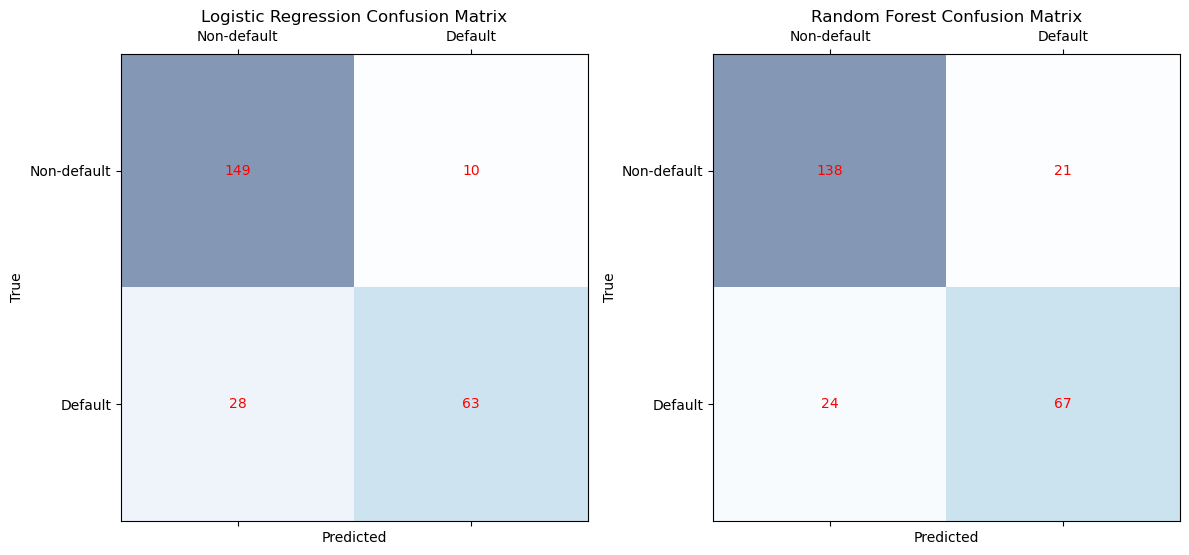

In [75]:
# Import required libraries
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

#  Data Split
X = df1.drop(columns=['default'])
y = df1['default']

#  Handle Missing Values by Imputing with Mean 
imputer = SimpleImputer(strategy='mean') 
X_imputed = imputer.fit_transform(X)

#  Train-Test Split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, stratify=y, random_state=42)

#  Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Model Building

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Random Forest Model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Step 6: Model Predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = random_forest.predict(X_test_scaled)

#  Evaluate Models Across Different Metrics

# Logistic Regression Metrics
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:,1])

# Random Forest Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test_scaled)[:,1])

# Print Metrics for Both Models
print("Logistic Regression Performance:")
print(f"Accuracy: {log_reg_accuracy:.4f}")
print(f"Precision: {log_reg_precision:.4f}")
print(f"Recall: {log_reg_recall:.4f}")
print(f"F1-Score: {log_reg_f1:.4f}")
print(f"ROC-AUC: {log_reg_roc_auc:.4f}")
print("\n")

print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"ROC-AUC: {rf_roc_auc:.4f}")
print("\n")

# Confusion Matrices for Both Models
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Logistic Regression Confusion Matrix:")
print(conf_matrix_log_reg)

print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)

# Visualize the Confusion Matrices using Matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Logistic Regression Confusion Matrix
ax1.matshow(conf_matrix_log_reg, cmap="Blues", alpha=0.5)
ax1.set_title("Logistic Regression Confusion Matrix")
for (i, j), value in np.ndenumerate(conf_matrix_log_reg):
    ax1.text(j, i, f'{value}', ha='center', va='center', color='red')

ax1.set_xticks([0, 1])
ax1.set_yticks([0, 1])
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')
ax1.set_xticklabels(['Non-default', 'Default'])
ax1.set_yticklabels(['Non-default', 'Default'])

# Random Forest Confusion Matrix
ax2.matshow(conf_matrix_rf, cmap="Blues", alpha=0.5)
ax2.set_title("Random Forest Confusion Matrix")
for (i, j), value in np.ndenumerate(conf_matrix_rf):
    ax2.text(j, i, f'{value}', ha='center', va='center', color='red')

ax2.set_xticks([0, 1])
ax2.set_yticks([0, 1])
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True')
ax2.set_xticklabels(['Non-default', 'Default'])
ax2.set_yticklabels(['Non-default', 'Default'])

plt.tight_layout()
plt.show()



# PART A: Model Performance Improvement
### - Dealing with multicollinearity using VIF - Identify optimal threshold for Logistic Regression using ROC curve - Hyperparameter Tuning for Random Forest - Model performance check across different metrics

# Model Performance Comparison and Final Model Selection

In [3]:

X = df1.drop(columns=['default'])
y = df1['default']

# Handle Missing Values by Imputing with Mean (or other strategies as needed)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-Test Split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, stratify=y, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build Models
# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Random Forest Model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Model Predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = random_forest.predict(X_test_scaled)

# Model Evaluation Metrics

# Logistic Regression Metrics
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])

# Random Forest Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test_scaled)[:, 1])

# Print metrics for both models
print("Logistic Regression Performance:")
print(f"Accuracy: {log_reg_accuracy:.4f}")
print(f"Precision: {log_reg_precision:.4f}")
print(f"Recall: {log_reg_recall:.4f}")
print(f"F1-Score: {log_reg_f1:.4f}")
print(f"ROC-AUC: {log_reg_roc_auc:.4f}")
print("\n")

print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"ROC-AUC: {rf_roc_auc:.4f}")
print("\n")

# Feature Importance (for Random Forest)
# Extract and plot feature importance for Random Forest
rf_feature_importance = random_forest.feature_importances_

# Create a DataFrame for better visualization
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf_feature_importance
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

print("Final Model Selected: Random Forest")

NameError: name 'df1' is not defined

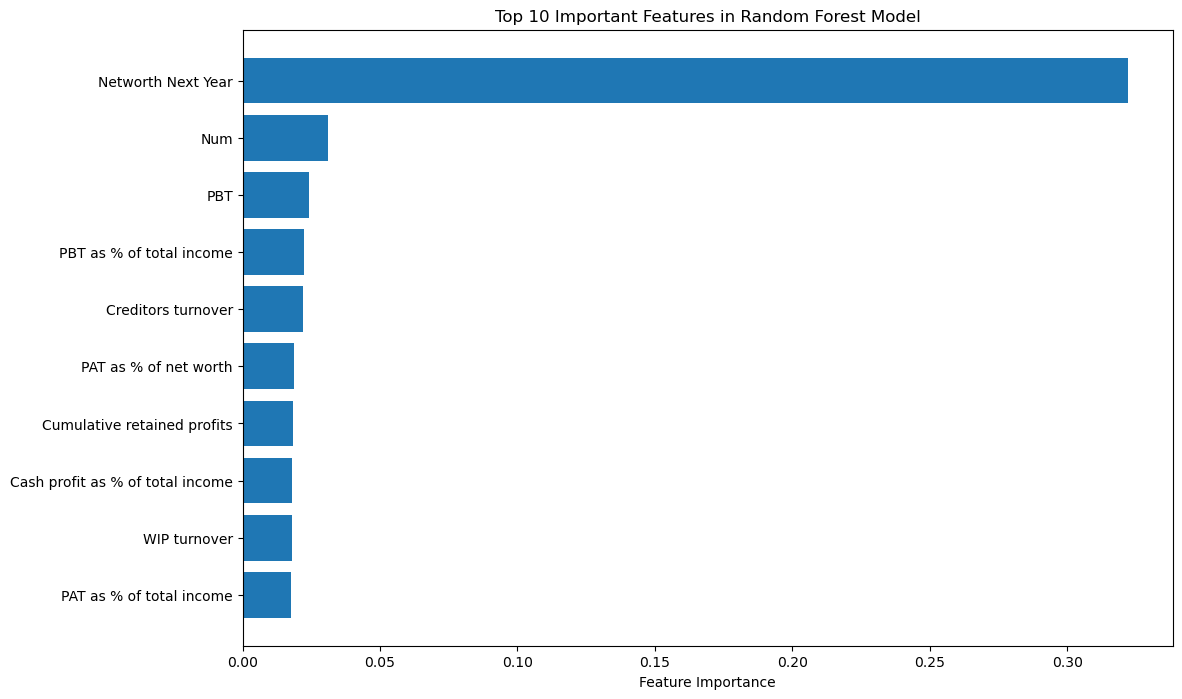

,Feature,Importance
1,Networth Next Year,0.322223
0,Num,0.030936
9,PBT,0.024018
12,PBT as % of total income,0.022317
40,Creditors turnover,0.021827
15,PAT as % of net worth,0.018875
25,Cumulative retained profits,0.018279
14,Cash profit as % of total income,0.017953
43,WIP turnover,0.017943
13,PAT as % of total income,0.017605


In [93]:
import matplotlib.pyplot as plt
import pandas as pd

importances = rf_model.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the top 10 features
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df.head(10)['Feature'], feature_importance_df.head(10)['Importance'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features in Random Forest Model')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()

feature_importance_df.head(10)  # Display the top 10 features with importance scores


In [102]:
# Define X (features) and y (target)
X = df1.drop('default', axis=1)  # Drop the target column 'default'
y = df1['default']  # Target column is 'default'


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Get the feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Createing a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print("\nTop 10 Most Important Features in Random Forest Model:")
print(feature_importance_df.head(10))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       106
           1       0.76      0.62      0.68        61

    accuracy                           0.79       167
   macro avg       0.78      0.75      0.76       167
weighted avg       0.79      0.79      0.79       167

Confusion Matrix:
 [[94 12]
 [23 38]]

Top 10 Most Important Features in Random Forest Model:
                             Feature  Importance
1                 Networth Next Year    0.322223
0                                Num    0.030936
9                                PBT    0.024018
12          PBT as % of total income    0.022317
40                Creditors turnover    0.021827
15             PAT as % of net worth    0.018875
25       Cumulative retained profits    0.018279
14  Cash profit as % of total income    0.017953
43                      WIP turnover    0.017943
13          PAT as % of total income    0.017605


# PART A: Actionable Insights & Recommendations
##### Based on the analysis of the Random Forest model and the importance of various features in predicting financial default, we can derive actionable insights and recommendations for businesses, investors, and financial analysts to prevent or mitigate the risk of default.

## Actionable Insights
### Networth Next Year is a Critical Indicator:

#### Insight: 
The projection of net worth for the next year is the most influential factor in predicting default risk. If future net worth is expected to decline significantly, it could indicate future financial stress.
#### Action:
Regularly update and analyze projections of net worth for the coming year. Create robust forecasting models using historical data, market trends, and financial forecasts to anticipate potential declines and take preemptive actions.
### Profitability Before and After Tax (PBT & PAT):

#### Insight:
Profitability ratios like PBT and PAT show how well a company is managing its revenues relative to its expenses. Strong profits reduce the likelihood of default.
#### Action: 
Regularly monitor profit margins. If PBT and PAT are declining, consider cost-cutting measures, pricing strategy adjustments, or exploring new revenue streams. Prioritize increasing operational efficiency to maintain profitability.
### Cash Flow Efficiency (Cash Profit as % of Total Income):

#### Insight: 
Cash profits are crucial for sustaining day-to-day operations and servicing debt. A strong cash flow indicates lower default risk.
#### Action: 
Focus on improving operational cash flows by reducing excess inventory, optimizing collections, and managing payable and receivable accounts effectively. Businesses should implement robust cash flow forecasting to avoid liquidity crises.
### Debt Management (Creditors Turnover):

#### Insight: 
The ability to efficiently pay creditors, as indicated by the creditors turnover ratio, plays an important role in default prediction.
#### Action: 
Aim to reduce payment delays and optimize cash management. If creditors’ turnover is low, improve vendor relationships, and renegotiate payment terms if necessary. A focus on maintaining a favorable relationship with suppliers could prevent future defaults.
### Retained Earnings and Profit Reinvestment (Cumulative Retained Profits):

#### Insight: 
High cumulative retained profits suggest a company’s capacity to reinvest earnings, support growth, and weather economic downturns.
#### Action:
Businesses should focus on retaining a portion of their profits for reinvestment. Avoid excessive dividend payouts, especially during economic uncertainty, to build a buffer of retained earnings for future stability.
### Work-In-Progress Management (WIP Turnover):

#### Insight: 
Efficient conversion of work-in-progress (WIP) into finished goods impacts cash flow, which is crucial for avoiding default.
#### Action:
Streamline production processes, improve supply chain coordination, and ensure that WIP is effectively managed and turned into revenue. Companies should monitor production timelines and avoid delays in product delivery.
## Recommendations for Improving Financial Health and Mitigating Default Risk
### Focus on Long-Term Financial Planning:

Regularly review and revise long-term financial plans based on projected net worth, profitability, and cash flow. Anticipating future financial states enables better preparation for potential risks.
### Implement Strategic Profitability Enhancement:

If PBT and PAT ratios are low, conduct internal audits to identify inefficiencies. Consider strategies such as diversifying revenue sources, increasing prices for profitable products, or reducing overhead costs without sacrificing quality.
### Build a Cash Flow Reserve:

Create a liquidity reserve that can be used in times of financial stress. This reserve should be built from retained earnings and used to handle unexpected expenses or slow periods of cash inflow.
### Negotiate Favorable Debt Terms:

Work on improving relationships with creditors and suppliers. Negotiate better terms (e.g., extended payment periods, lower interest rates) to maintain healthy cash flow and reduce the risk of default due to tight liquidity.
### Strengthen Credit Management:

Implement stricter credit control policies to reduce the risk of non-payment. Regularly assess the creditworthiness of customers and adjust payment terms accordingly to minimize bad debts.
### Optimize Production and Inventory:

Reduce the time work-in-progress is held in inventory by optimizing manufacturing processes. Use lean management techniques to speed up production cycles and free up cash more efficiently.
## Recommendations for Stakeholders:
### Investors:

#### Action: 
Focus on companies with strong financial metrics, especially those with solid net worth projections, healthy profitability, and effective cash flow management. Consider companies with low reliance on debt and high retained earnings as safer investment options.
### Financial Analysts:

#### Action:
Use the top financial indicators (such as net worth projections, profitability ratios, and liquidity measures) to create early-warning systems for potential defaults. Analyze these metrics frequently to spot negative trends before they result in significant risks.
### Corporate Management:

#### Action:
Ensure transparent financial reporting, especially focusing on projections of future performance. Implement robust internal controls to maintain cash flow, manage debt efficiently, and retain profits for reinvestment into the business.
### Creditors/Bankers:

#### Action: 
Focus on clients that consistently meet their debt repayment obligations and maintain healthy liquidity. Look for strong profitability ratios, particularly PBT and PAT, and avoid companies with fluctuating cash flow or delayed payments to reduce the risk of lending to companies on the brink of default.
## Conclusion:
The insights from the Random Forest model suggest that financial health, particularly focusing on profitability, cash flow, and future projections of net worth, plays a significant role in determining a company’s risk of default. By closely monitoring these key indicators and implementing proactive measures, businesses can mitigate their risk and ensure financial stability.

These actionable insights and recommendations will help stakeholders make more informed decisions to reduce the likelihood of defaults and promote sustainable business growth.

# PART B: Stock Market Data Analysis

### Loading the dataset for Part B

In [130]:
df2 = pd.read_csv('Market_Risk_Data_coded.csv')

In [144]:
df2.head()

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,2016-03-28,217,316,386,114,173
1,2016-04-04,218,302,386,121,171
2,2016-04-11,215,308,374,120,171
3,2016-04-18,223,320,408,122,172
4,2016-04-25,214,319,418,122,175


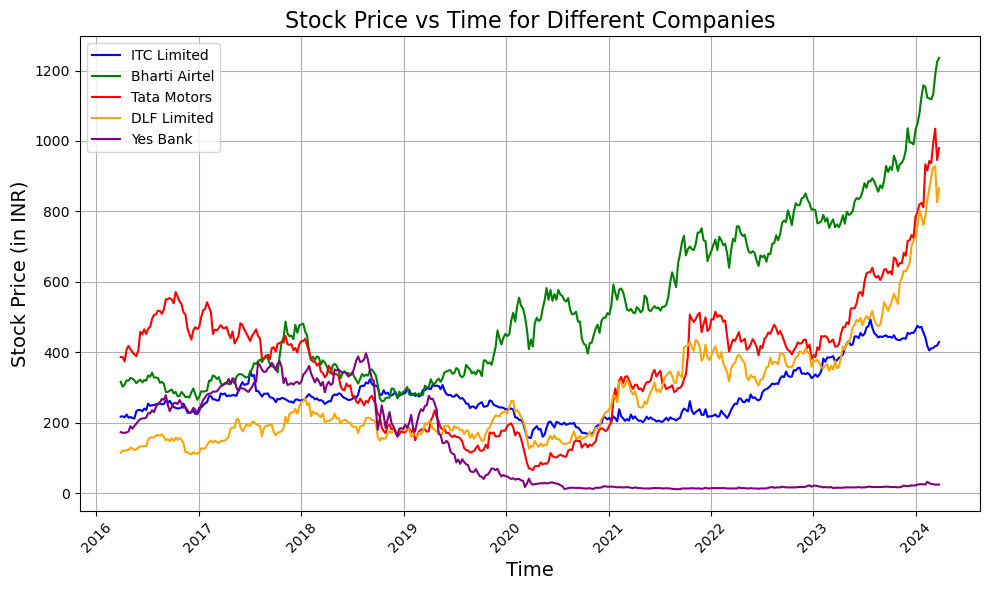

In [170]:
import pandas as pd
import matplotlib.pyplot as plt


#  Convert the 'Date' column to datetime format
df2['Date'] = pd.to_datetime(df2['Date'])

#  Plot Stock Price vs Time for each company

plt.figure(figsize=(10, 6))

# Plot each company's stock price over time
plt.plot(df2['Date'], df2['ITC Limited'], label='ITC Limited', color='blue')
plt.plot(df2['Date'], df2['Bharti Airtel'], label='Bharti Airtel', color='green')
plt.plot(df2['Date'], df2['Tata Motors'], label='Tata Motors', color='red')
plt.plot(df2['Date'], df2['DLF Limited'], label='DLF Limited', color='orange')
plt.plot(df2['Date'], df2['Yes Bank'], label='Yes Bank', color='purple')

# Customizing the plot
plt.title('Stock Price vs Time for Different Companies', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Stock Price (in INR)', fontsize=14)
plt.grid(True)
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


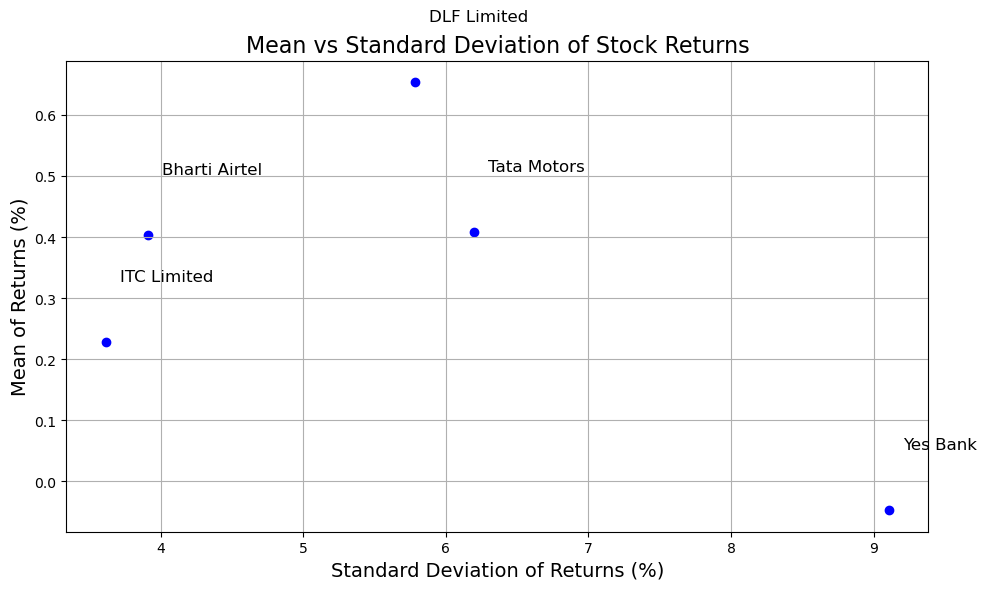

Mean of returns:
 ITC Limited      0.228132
Bharti Airtel    0.402905
Tata Motors      0.408791
DLF Limited      0.654037
Yes Bank        -0.047529
dtype: float64

Standard Deviation of returns:
 ITC Limited      3.612685
Bharti Airtel    3.907315
Tata Motors      6.197597
DLF Limited      5.779594
Yes Bank         9.109497
dtype: float64


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Calculate daily returns for all stocks
stocks = ['ITC Limited', 'Bharti Airtel', 'Tata Motors', 'DLF Limited', 'Yes Bank']
returns = pd.DataFrame()

for stock in stocks:
    returns[stock] = df2[stock].pct_change() * 100  # Percentage change (returns)

# Step 3: Calculate mean and standard deviation of returns
mean_returns = returns.mean()  # Mean of daily returns
std_returns = returns.std()   # Standard deviation of returns

# Step 4: Plot Mean vs Standard Deviation for all stocks
plt.figure(figsize=(10, 6))

# Scatter plot of Mean vs Standard Deviation
plt.scatter(std_returns, mean_returns, color='blue')

# Annotate each point with the stock name
for i, stock in enumerate(stocks):
    plt.text(std_returns[i] + 0.1, mean_returns[i] + 0.1, stock, fontsize=12)

# Labels and title
plt.title('Mean vs Standard Deviation of Stock Returns', fontsize=16)
plt.xlabel('Standard Deviation of Returns (%)', fontsize=14)
plt.ylabel('Mean of Returns (%)', fontsize=14)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

# Step 5: Observations
# Printing the mean and standard deviation for each stock
print("Mean of returns:\n", mean_returns)
print("\nStandard Deviation of returns:\n", std_returns)



# Actionable Insights and Recommendations from Part B:
## Insights:
### Stock Price Trends Over Time:

* Bharti Airtel and DLF Limited show a significant and consistent upward trend in their stock prices, indicating strong market performance and growth potential.
* Tata Motors has experienced fluctuations but shows an overall upward trend, signaling recovery and resilience.
ITC Limited exhibits a stable growth pattern, making it a relatively low-risk investment.
* Yes Bank shows a stagnant or declining trend, indicating financial struggles and a lack of investor confidence.
### Risk vs Return Analysis (Scatter Plot):

* DLF Limited offers the highest average returns (0.65%) with a moderate standard deviation (5.78%), indicating higher returns with medium risk.
* Yes Bank has the highest standard deviation (9.11%) and negative average returns (-0.04%), making it a high-risk, low-return stock.
* Tata Motors and Bharti Airtel strike a balance between risk and return, with Bharti Airtel offering lower risk and moderate returns.
* ITC Limited has the lowest risk (standard deviation: 3.61%) but also offers the lowest positive returns (0.23%), making it suitable for risk-averse investors.
## Recommendations:
### For Risk-Averse Investors:

Consider investing in ITC Limited for its stability and low risk. It’s suitable for conservative portfolios prioritizing capital preservation.
### For Growth-Oriented Investors:

DLF Limited is a top pick due to its high returns and moderate risk. It aligns well with investors seeking aggressive growth opportunities.
### Diversified Investment Strategy:

Combine Bharti Airtel and Tata Motors to achieve a balance between risk and return. Bharti Airtel offers moderate risk and consistent growth, while Tata Motors provides exposure to the automobile sector's potential upside.
### Avoid High-Risk Stocks:

Avoid or limit exposure to Yes Bank due to its negative average returns and high volatility. It’s currently unsuitable for long-term investments.
### Sectoral Diversification:

Invest across different sectors represented by the companies to minimize sector-specific risks (e.g., FMCG with ITC Limited, Telecom with Bharti Airtel, Real Estate with DLF Limited, and Automotive with Tata Motors).
### Monitor External Factors:

Closely watch macroeconomic trends, such as interest rates, inflation, and sectoral policies, which could influence the performance of these stocks.